In [1]:
#Importing the Essential Libraries, Metrics and Models

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Loading the data
df = pd.read_csv("F:\Ekeeda\Concrete Compressive Strength Prediction Data Set\Concrete_Data.csv")

In [4]:
#Exploratory Data Analysis

In [5]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
#Checking Non Null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
#Statistical Summary of Dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
#Handling missing values and dublicates

In [12]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [13]:
#Checking for dublicates in data

In [14]:
df.duplicated().sum()

25

In [15]:
#Dropping all the duplicated values from the dataset

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
#Data Visualization

In [18]:
#Visualizing the correlation bbetween the numerical variables using pairplot visualization

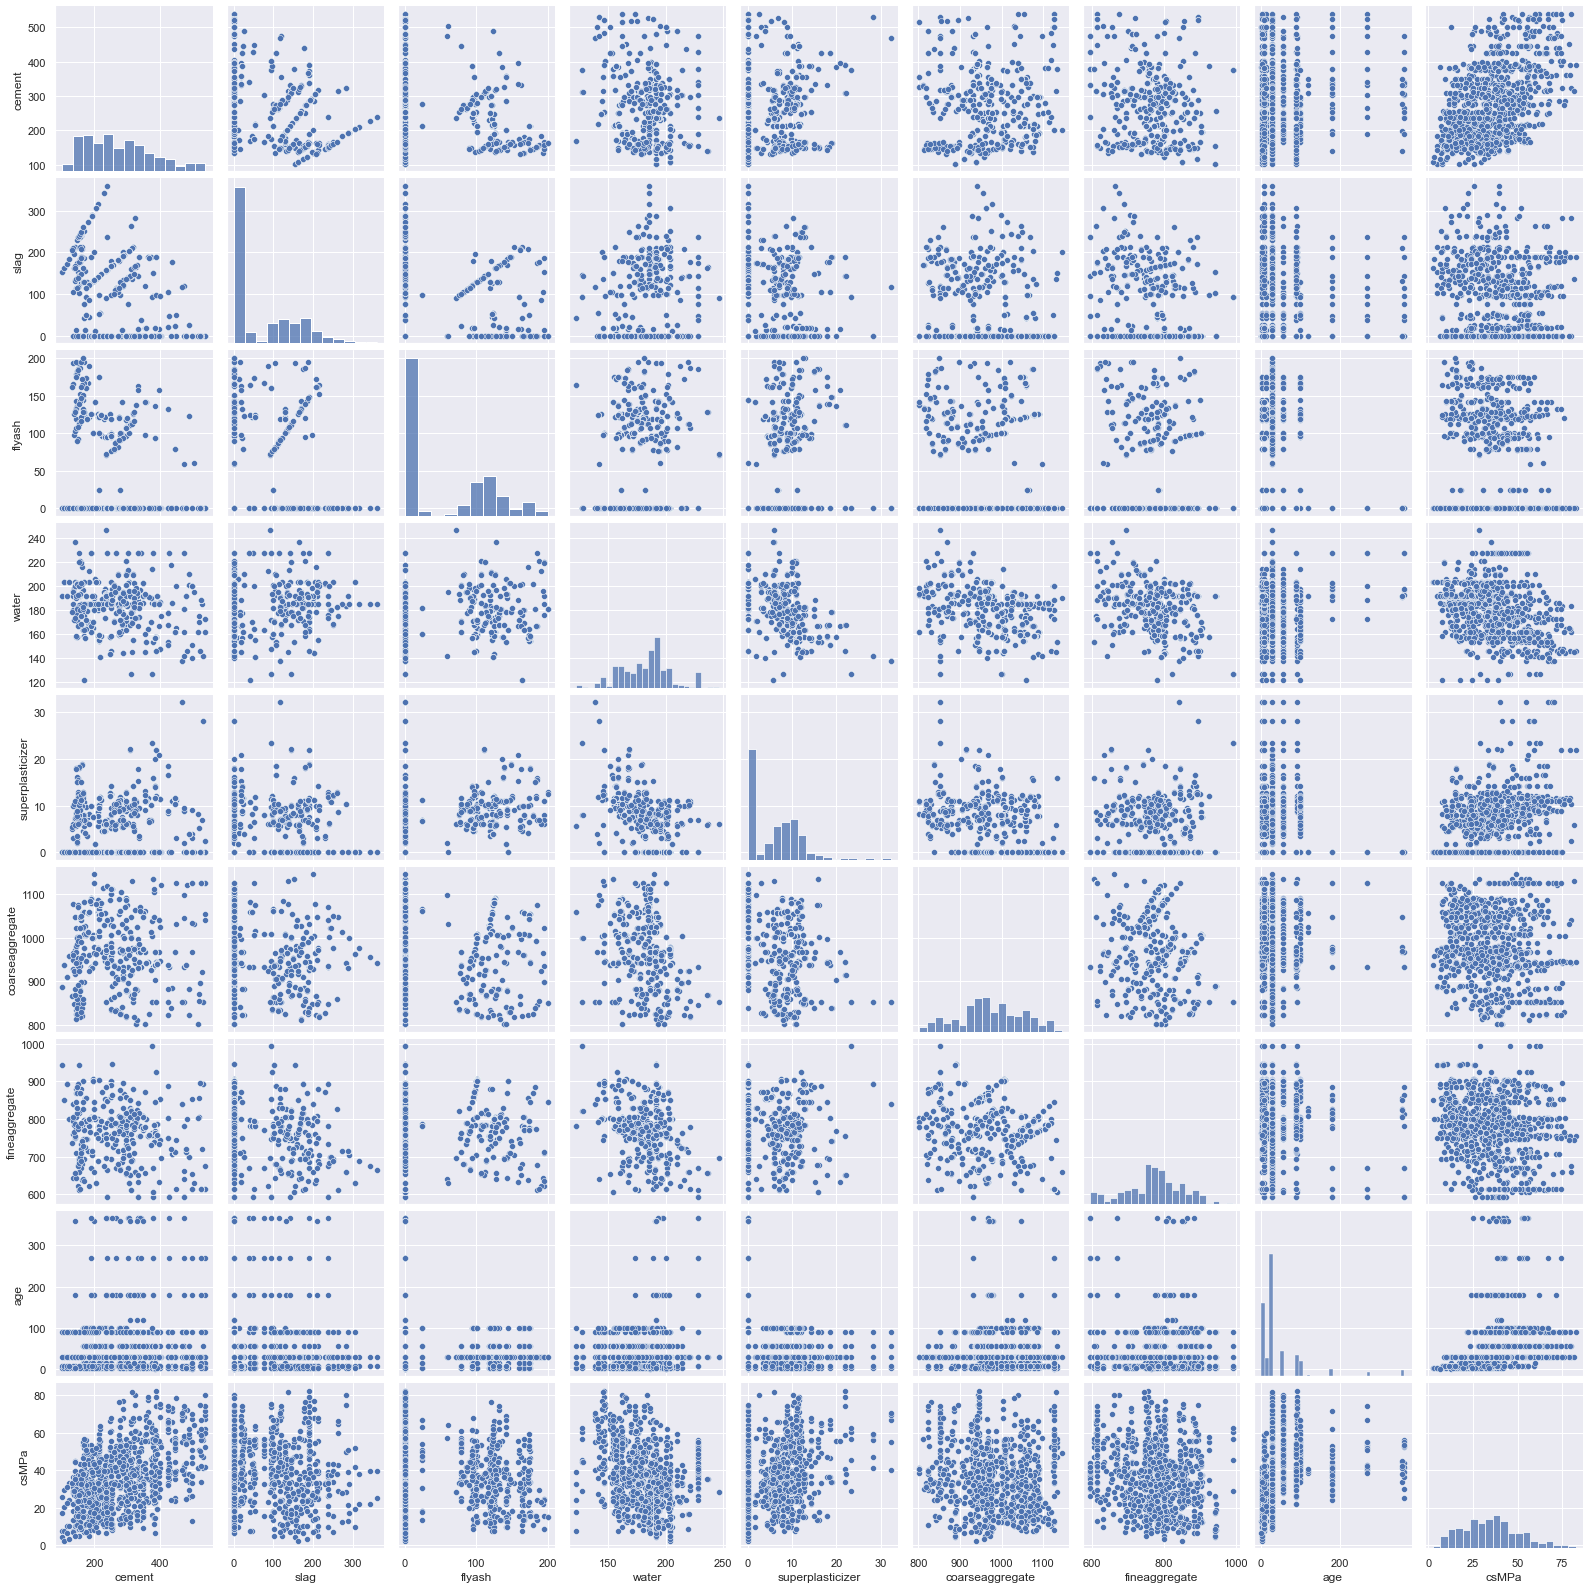

In [19]:
sns.set_theme()
sns.pairplot(df)

In [20]:
#Distribution of Each Variable

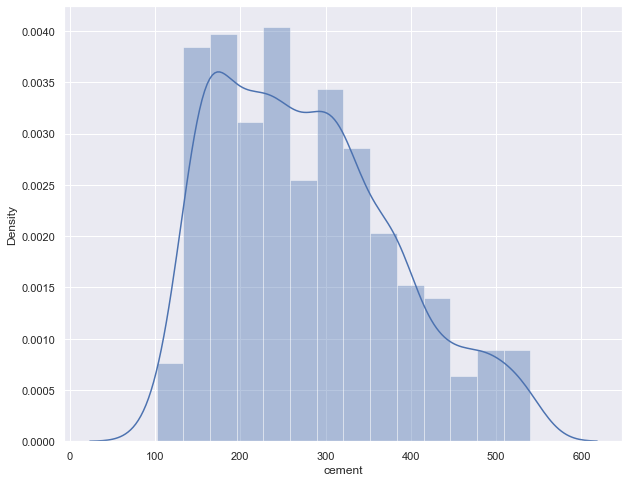

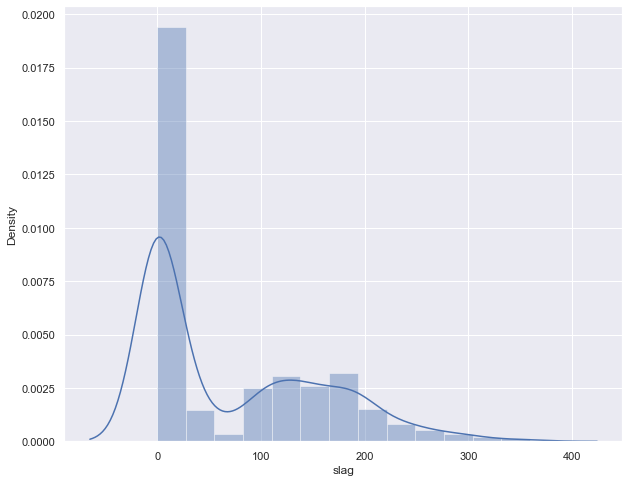

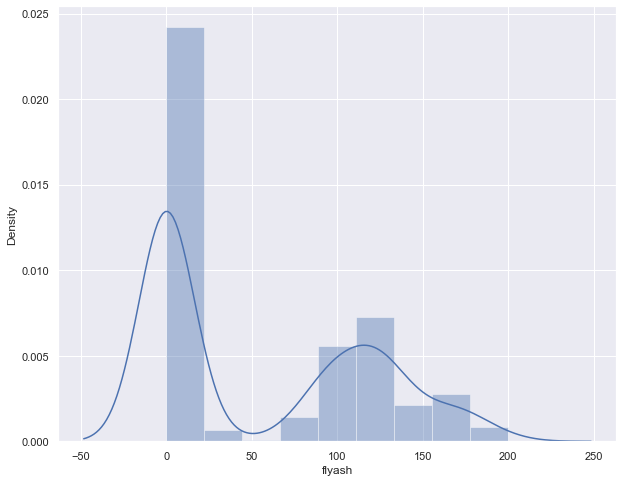

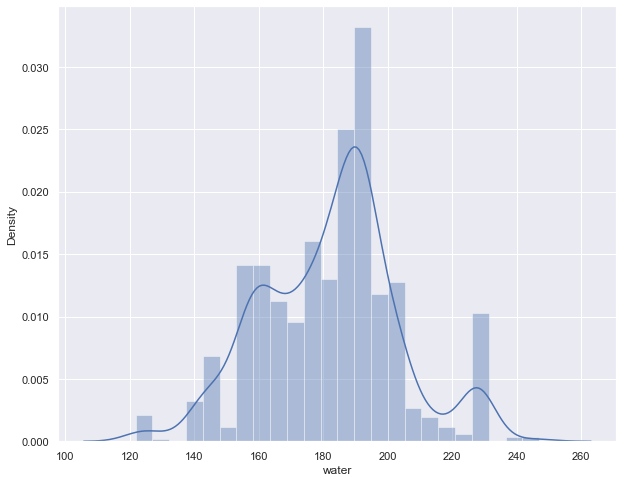

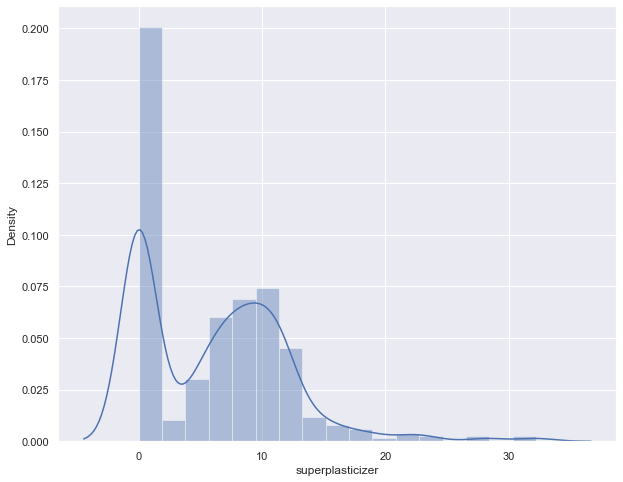

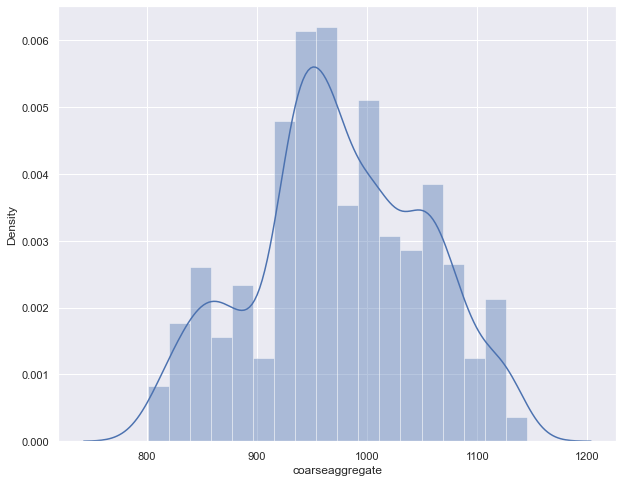

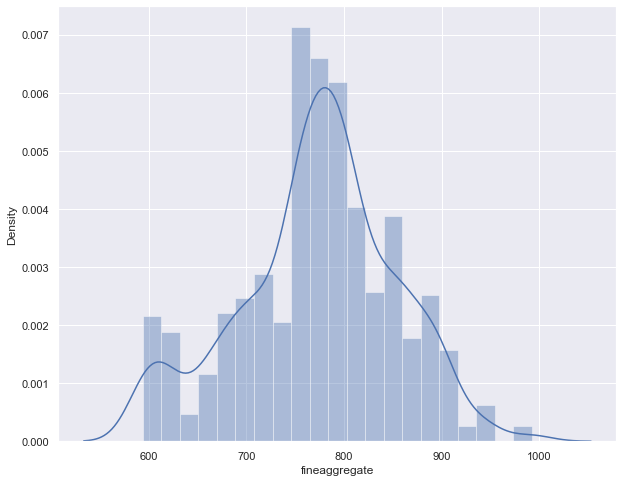

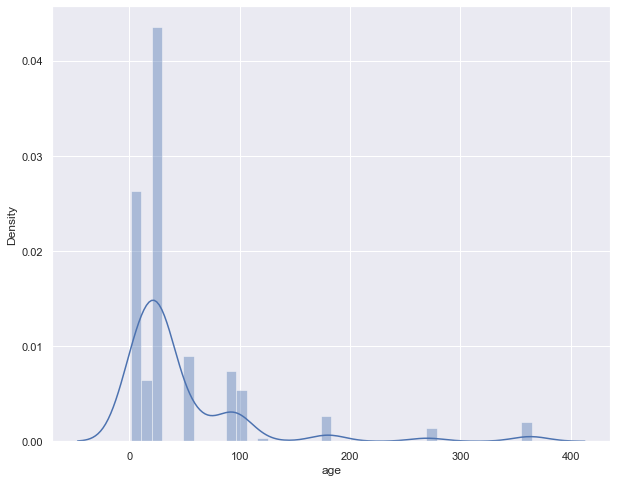

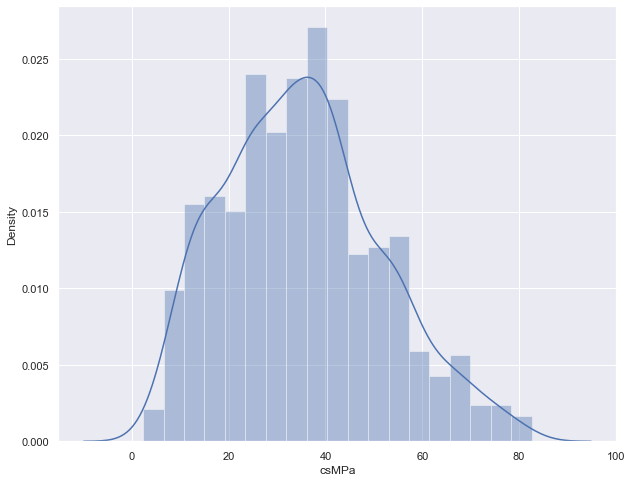

In [21]:
for col in df.columns:
        plt.figure(figsize=(10,8))
        sns.distplot(df[col])
        plt.show()

In [22]:
#Relationship between Each Variable and Target Variable (csMPa)

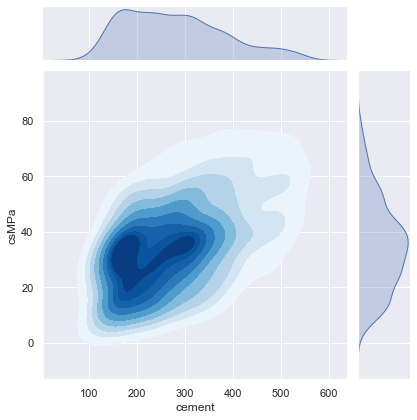

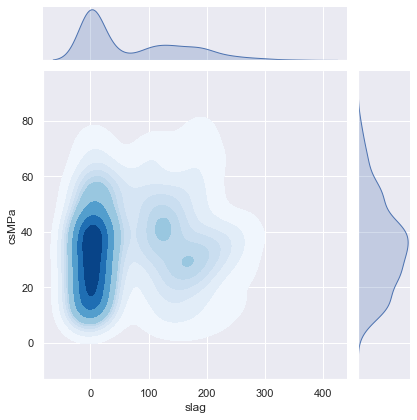

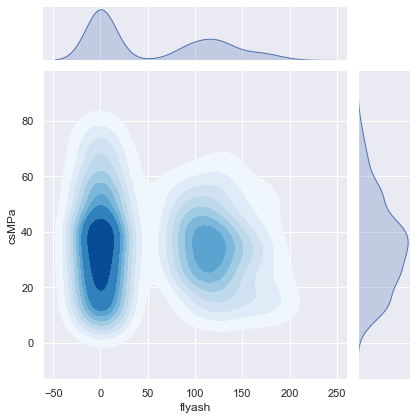

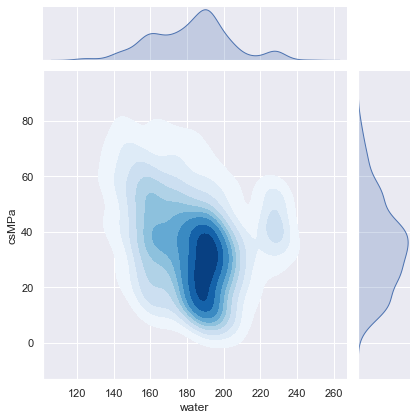

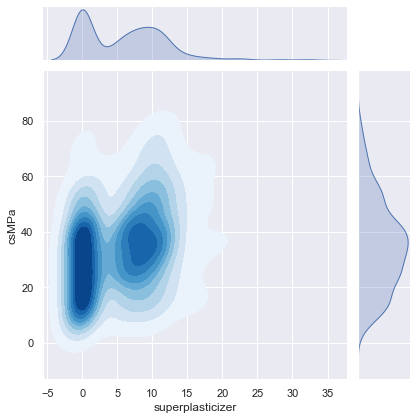

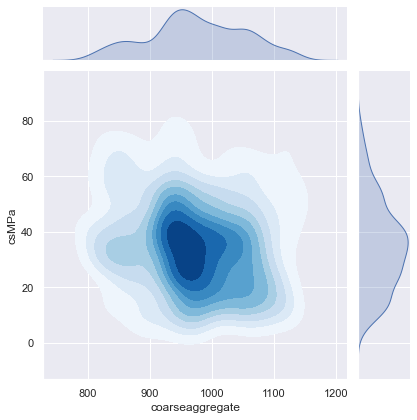

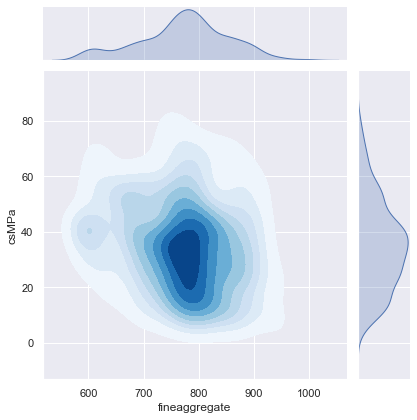

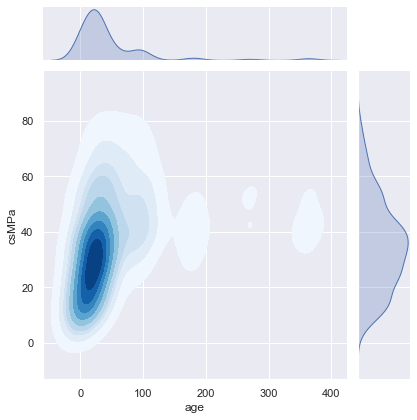

In [23]:
sns.set(style="darkgrid")

cols_without_y = df.drop("csMPa", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=df[col], y=df["csMPa"], kind="kde", cmap="Blues", fill=True)
    plt.show()

In [24]:
#Visualizing the linear correlations between variables using Heatmap visualization. 
#The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.

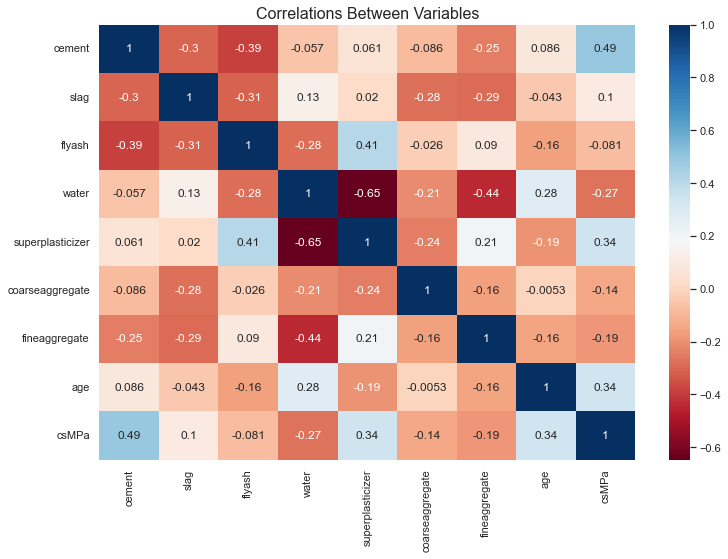

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

In [26]:
#X, y Split

In [27]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

In [28]:
#Data Standardization

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
#Train-Test Split
#Spliting the data into train and test chunks for better evaluation.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [32]:
#Defining several evaluation functions for convenience.

In [33]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

In [34]:
#Machine Learning Models

In [35]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

In [36]:
#Linear Regression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.308725554719059
MSE: 103.33485803835873
r2 Score: 0.6524501460722181
RMSE (Cross Validated): 10.983075882282813


In [38]:
#Lasso (L1 Regularization)

In [39]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 9.082458386308438
MSE: 124.65496404848872
r2 Score: 0.5807434648011709
RMSE (Cross Validated): 11.612295575311416


In [40]:
#Ridge (L2 Regularization)

In [41]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.31733816236833
MSE: 103.57877896743301
r2 Score: 0.6516297580165415
RMSE (Cross Validated): 10.975634268892303


In [42]:
#Elastic Net

In [43]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 9.93904147235652
MSE: 151.61003626689538
r2 Score: 0.4900844985049915
RMSE (Cross Validated): 12.418741937178364


In [44]:
#Support Vector Machines 

In [45]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.359893741431106
MSE: 116.5517929930046
r2 Score: 0.6079971521836021
RMSE (Cross Validated): 12.030395231584912


In [46]:
#Random Forest

In [47]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 3.5513367938087357
MSE: 25.050101663911647
r2 Score: 0.915748089856215
RMSE (Cross Validated): 10.261019837997718


In [48]:
#XGBoost

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(xgb)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 2.6722472243048063
MSE: 16.510880591148556
r2 Score: 0.9444683599841729
RMSE (Cross Validated): 9.324257827263114


In [51]:
#Model Comparison

In [52]:
models.sort_values(by="RMSE (Cross Validated)")

,Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
6,XGBRegressor,2.672247,16.510881,0.944468,9.324258
5,RandomForestRegressor,3.551337,25.050102,0.915748,10.26102
2,Ridge,8.317338,103.578779,0.65163,10.975634
0,LinearRegression,8.308726,103.334858,0.65245,10.983076
1,Lasso,9.082458,124.654964,0.580743,11.612296
4,SVR,8.359894,116.551793,0.607997,12.030395
3,ElasticNet,9.939041,151.610036,0.490084,12.418742


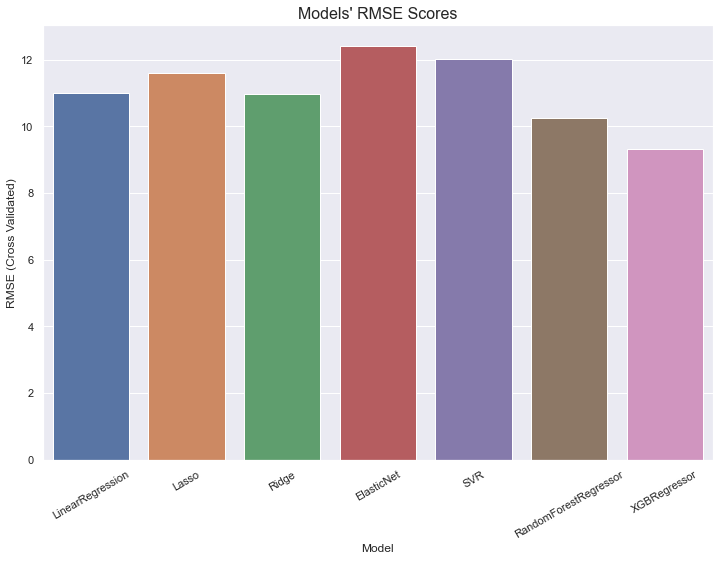

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross Validated)"])
plt.title("Models' RMSE Scores", size=16)
plt.xticks(rotation=30)
plt.show()

In [54]:
#Hyperparameter Tuning

In [55]:
tuned_models = pd.DataFrame(columns=["Tuned Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

In [56]:
#Tuning the lasso

In [57]:
lasso_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(Lasso(), lasso_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [58]:
lasso_params = lasso_grid.best_params_

tuned_lasso = Lasso(**lasso_params)
tuned_lasso.fit(X_train, y_train)
predictions = tuned_lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 8.320730599800108
MSE: 103.65860337640937
r2 Score: 0.6513612817036472
RMSE (Cross Validated): 10.974755969862093


In [59]:
#Tuning the Ridge

In [60]:
ridge_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

ridge_grid = GridSearchCV(Ridge(), ridge_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [61]:
ridge_params = ridge_grid.best_params_

tuned_ridge = Ridge(**ridge_params)
tuned_ridge.fit(X_train, y_train)
predictions = tuned_ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_ridge)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 8.31733816236833
MSE: 103.57877896743301
r2 Score: 0.6516297580165415
RMSE (Cross Validated): 10.975634268892303


In [62]:
#Tuning the Elastic Net

In [63]:
elasticnet_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "l1_ratio": np.arange(0, 1, 0.05)}

elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

elasticnet_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [64]:
elasticnet_params = elasticnet_grid.best_params_

tuned_elasticnet = ElasticNet(**elasticnet_params)
tuned_elasticnet.fit(X_train, y_train)
predictions = tuned_elasticnet.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_elasticnet)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Elastic Net","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 8.326130728263577
MSE: 103.82179810453488
r2 Score: 0.6508124029903213
RMSE (Cross Validated): 10.968818204195056


In [65]:
#Tuning the Support Vector Machines

In [66]:
svr_grid_params = {"kernel": ["linear", "rbf"],
                   "C": [1, 10, 100, 1000],
                   "epsilon": [0.001, 0.01, 0.1, 1, 10, 100],
                   "gamma": [0.001, 0.01, 0.1, 1]}

svr_grid = GridSearchCV(SVR(), svr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [67]:
svr_params = svr_grid.best_params_

tuned_svr = SVR(**svr_params)
tuned_svr.fit(X_train, y_train)
predictions = tuned_svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 3.9390987880476382
MSE: 29.261128258996674
r2 Score: 0.9015849922743271
RMSE (Cross Validated): 11.242886185270086


In [68]:
#Tuning the Random Forest

In [69]:
rfr_grid_params = {"n_estimators": [100, 200, 500],
                   "max_depth": [None, 2, 3, 5],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 5]}

rfr_grid = GridSearchCV(RandomForestRegressor(), rfr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [70]:
rfr_params = rfr_grid.best_params_

tuned_rfr = RandomForestRegressor(**rfr_params)
tuned_rfr.fit(X_train, y_train)
predictions = tuned_rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 3.519687463628836
MSE: 24.549480516643367
r2 Score: 0.91743184701144
RMSE (Cross Validated): 10.10031624736682


In [71]:
#Model Comparison After Hyperparameter Tuning

In [72]:
tuned_models.sort_values(by="RMSE (Cross Validated)")

,Tuned Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
4,RandomForestRegressor,3.519687,24.549481,0.917432,10.100316
2,Elastic Net,8.326131,103.821798,0.650812,10.968818
0,Lasso,8.320731,103.658603,0.651361,10.974756
1,Ridge,8.317338,103.578779,0.65163,10.975634
3,SVR,3.939099,29.261128,0.901585,11.242886


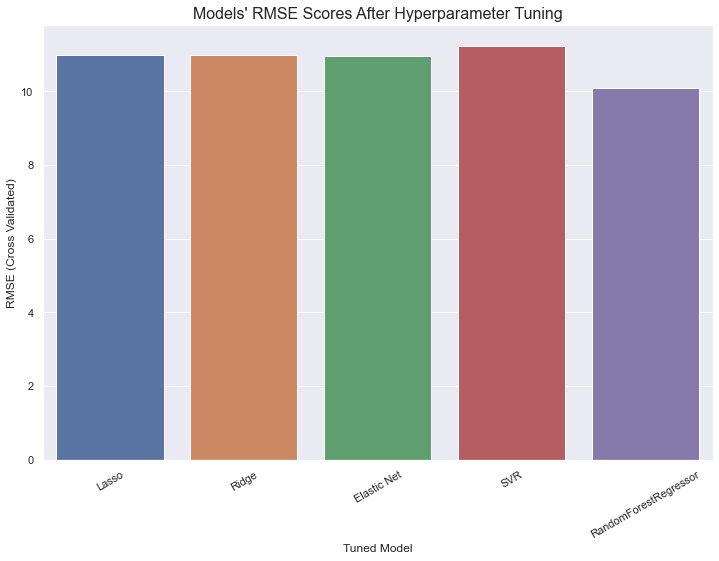

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x=tuned_models["Tuned Model"], y=tuned_models["RMSE (Cross Validated)"])
plt.title("Models' RMSE Scores After Hyperparameter Tuning", size=16)
plt.xticks(rotation=30)
plt.show()